# E-commerce Customer Segmentation
A key challenge for e-commerce businesses is to analyze the trend in the
market to increase their sales. The trend can be easily observed if the
companies can group the customers; based on their activity on the ecommerce site. This grouping can be done by applying different criteria like
previous orders, mostly searched brands and so on.

The data was collected from a well known e-commerce website over a
period of time based on the customer’s search profile.

# 1. Import Libraries

In [1]:
#[Data Transformation]
import pandas as pd
import numpy as np

#[Model]
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

#[Visualization]
import matplotlib.pyplot as plt
import seaborn as sns

#[Warnings]
import warnings
warnings.filterwarnings('ignore')

# 2. Load Data

In [2]:
df = pd.read_excel("Data/cust_data.xlsx")
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

|__Column__| Description |
| :--- |:--- |
|__Cust_ID__| Unique numbering for customers |
|__Gender__| Gender of the customers |
|__Orders__| Number of orders placed by the customer in the past|
|__Others__| Number of times customers have searched the brands |

In [4]:
# How much of data
df.shape

(30000, 38)

In [5]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [6]:
# Numerical summary
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [7]:
# Statitical Summary
df.describe(include='object')

,Gender
count,27276
unique,2
top,F
freq,22054


In [8]:
# Check for missing values
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

Text(0.5, 1.0, 'Heatmap for Missing Values')

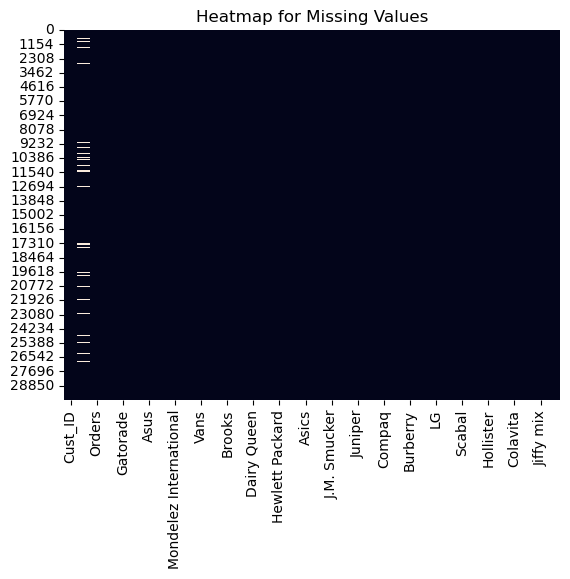

In [9]:
sns.heatmap(df.isnull(),cbar=False)
plt.title('Heatmap for Missing Values')

In [10]:
len(df["Cust_ID"].unique())

30000

In [11]:
# Duplicates
df.duplicated().sum()

0

**Inference:**
- **Number of Entries:** The dataset consists of **30,000** rows and **38** columns.
- **Data types:** The dataset mostly consists of **int64** except for "Gender" as **object**.
- **Missing values:** There are **2724** missing values in *Gender* feature.
- **Features:** All the features are of numerical type except "Gender" which can be encoded.
- "Cust_ID" feature has complete unique values which cannot be of much use to the model and hence can be removed.
- **Unique:** There isn't any duplicates in the dataset.

# 3. Data Preparation

## 3.1 Feature Selection
Irrelevant features are removed.

In [12]:
# Drop columns
df2 = df.copy()
df2.drop(columns=["Cust_ID"], inplace=True)
df2

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,M,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,M,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29998,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.2 Missing Values
Missing data can be problematic because it can lead to biased results and hinder the effectiveness of your analysis.

In [13]:
df2["Gender"].unique()

array(['M', 'F', nan], dtype=object)

In [14]:
print('Gender count:\n', df2['Gender'].value_counts())

Gender count:
 F    22054
M     5222
Name: Gender, dtype: int64


One of the category (Female) dominates the Male category that means uneven distribution is seen. Hence using `dummy encoding` instead of `mode` replacement technique for categorical feature.

In [15]:
# Percentage of missing values
total = df2.isnull().sum().sort_values(ascending=False)
percent = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])

In [16]:
missing_data

,Total,Percent
Gender,2724,9.08
J.M. Smucker,0,0.00
Juniper,0,0.00
Huawei,0,0.00
Compaq,0,0.00
IBM,0,0.00
Burberry,0,0.00
Mi,0,0.00
LG,0,0.00
Dior,0,0.00


In [17]:
df2["Gender"].fillna(df2["Gender"].mode().iloc[0], inplace= True)

# 4. EDA (Exploratory Data Analysis)
Exploratory Data Analysis (EDA) is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis.

## 4.1 Distribution of orders

<AxesSubplot:xlabel='Orders', ylabel='count'>

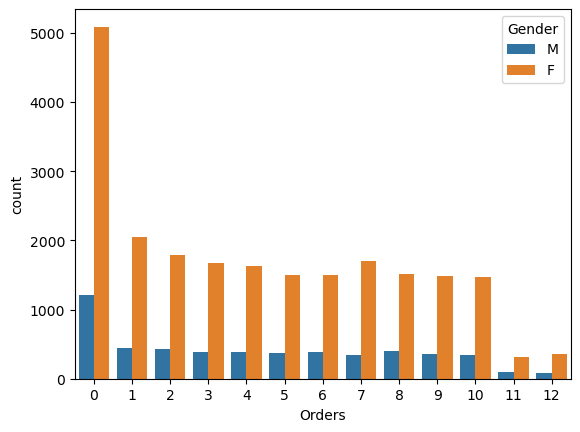

In [28]:
# Order count vs Gender
sns.countplot(x= "Orders", hue = "Gender", data= df)

In [29]:
brands = ['Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft']

## 4.2 Total customer views

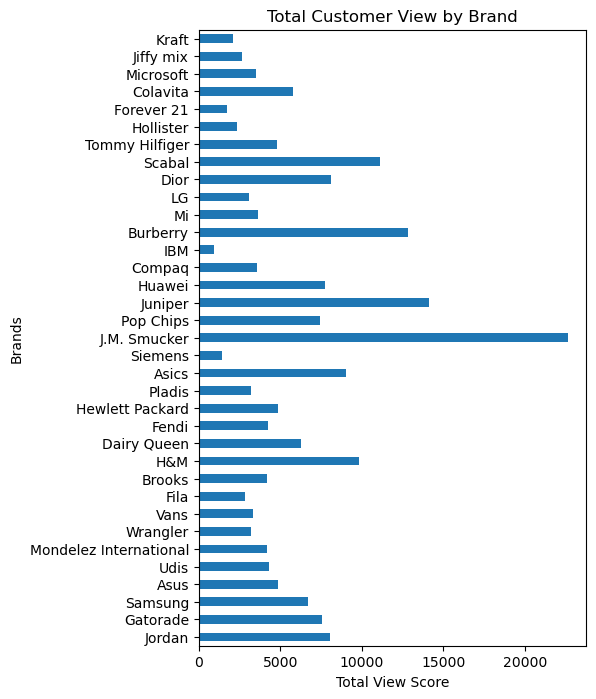

In [30]:
# Total Customer View by Brand
views = df2[brands].sum()
views.plot(kind='barh', figsize=(5,8))
plt.ylabel('Brands')
plt.xlabel('Total View Score')
plt.title('Total Customer View by Brand')
plt.show()

## 4.3 Distribution of Gender

Gender count:
 F    22054
M     5222
Name: Gender, dtype: int64


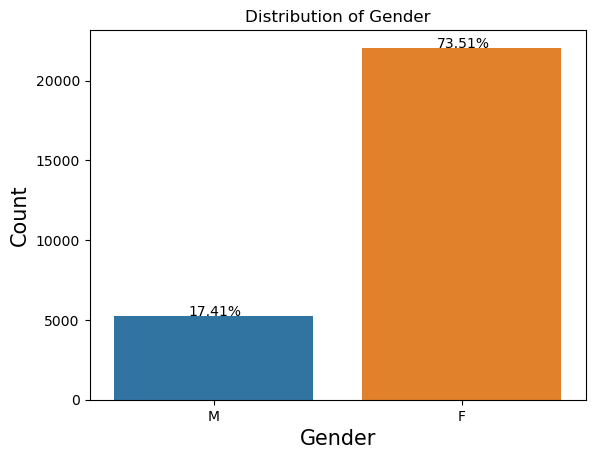

In [31]:
# print the number of Gender count
print('Gender count:\n', df['Gender'].value_counts())

# plot the count
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Count', fontsize=15)

# to showpercent on top of bar
# x and y gives the position of text
# s is the text
plt.text(x=-0.1, y=df.Gender.value_counts()["M"]+ 20, s=str(round((df.Gender.value_counts()["M"])*100/len(df.Gender),2)) + '%')
plt.text(x=0.9, y=df.Gender.value_counts()["F"]+ 20, s=str(round((df.Gender.value_counts()["F"])*100/len(df.Gender),2)) + '%')
plt.show()

## 4.4 Distribution

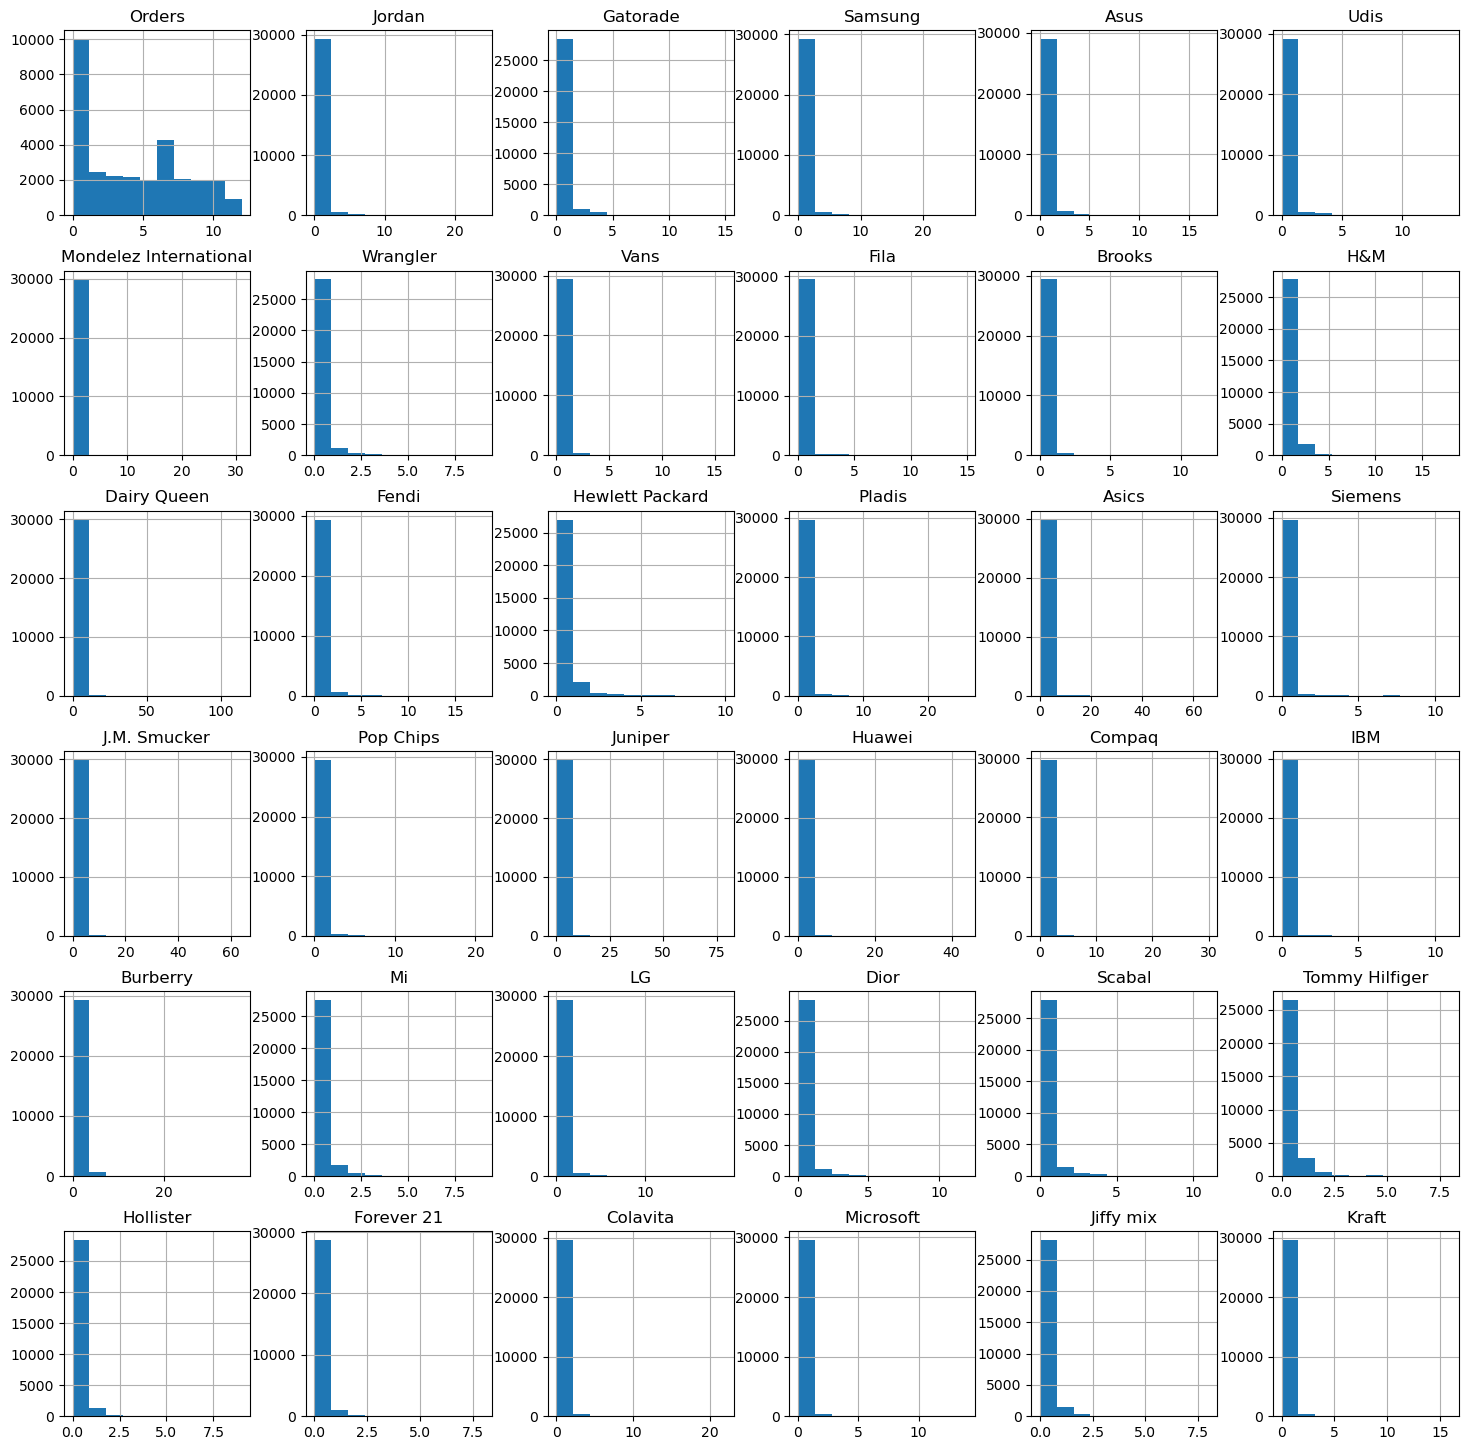

In [32]:
fig = df2.hist(figsize=(18,18))

# 5. K-Means Clustering


## 5.1 Prepare the dataset

In [33]:
# Considering brand names to segment the customers. 
# Drop Gender_F, Gender_F, Orders

# df3 = df2.drop(["Orders", "Gender_F", "Gender_M"], axis=1)
df3 = df2.drop(["Orders", "Gender"], axis=1)
df3.head() 

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


## 5.2 Scaling the data
K-means calculates the distance between data points using Euclidean distance. This distance measure is heavily influenced by the scale of the features in your data.

In [34]:
# Creating an object for the StandardScaler function
X = StandardScaler()

scaled_df = pd.DataFrame(X.fit_transform(df3), columns=df3.columns)
scaled_df.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


In [35]:
scaled_df

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,1.824571,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29996,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29997,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29998,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775


## 5.3 Mulitiple K- valued Clusters

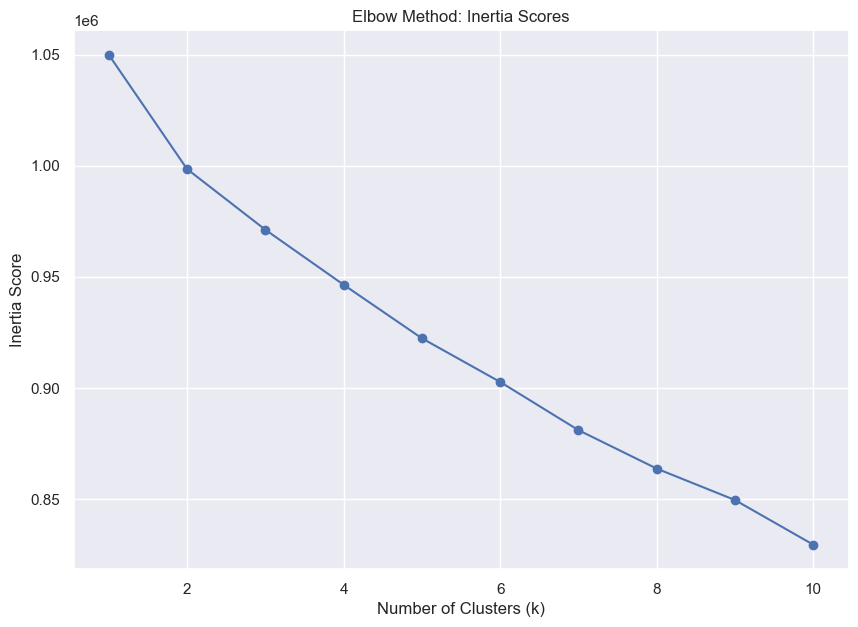

In [36]:
# K-Elbow Method
# Calculating WSS 

k_values = range(1, 11)
wss = []
for i in k_values:
    KM = KMeans(n_clusters=i, random_state= 10)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

sns.set_theme()
plt.figure(figsize=(10, 7))
plt.plot(k_values, wss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia Score')
plt.title('Elbow Method: Inertia Scores')
plt.show()

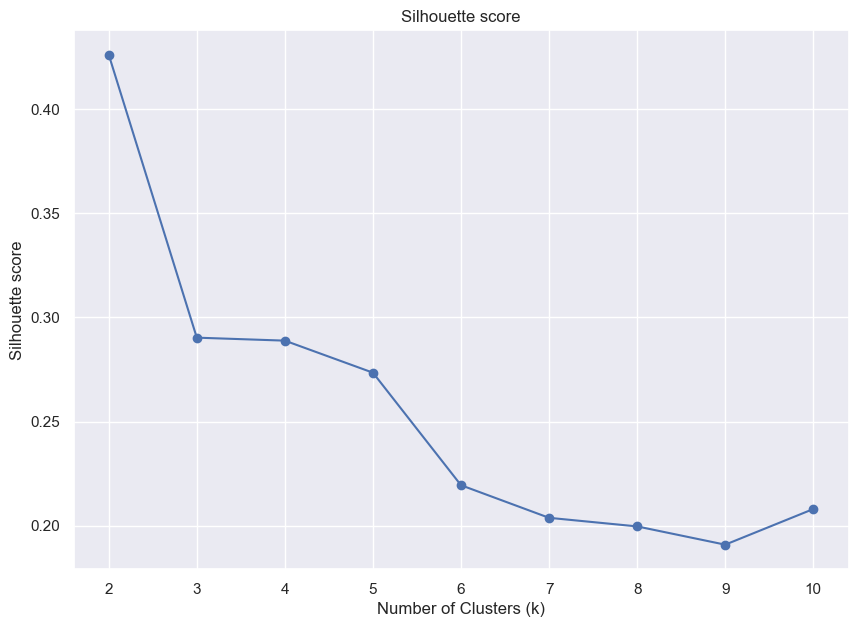

In [37]:
# Silhouette score [-1, 1]

scores = []
k_values=[2,3,4,5,6,7,8,9,10]
for k in k_values:
    cluster = KMeans(n_clusters = k, random_state = 10)
    predict = cluster.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, predict, random_state= 10)
    scores.append(score)

sns.set_theme()
plt.figure(figsize=(10, 7))
plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')
plt.show()

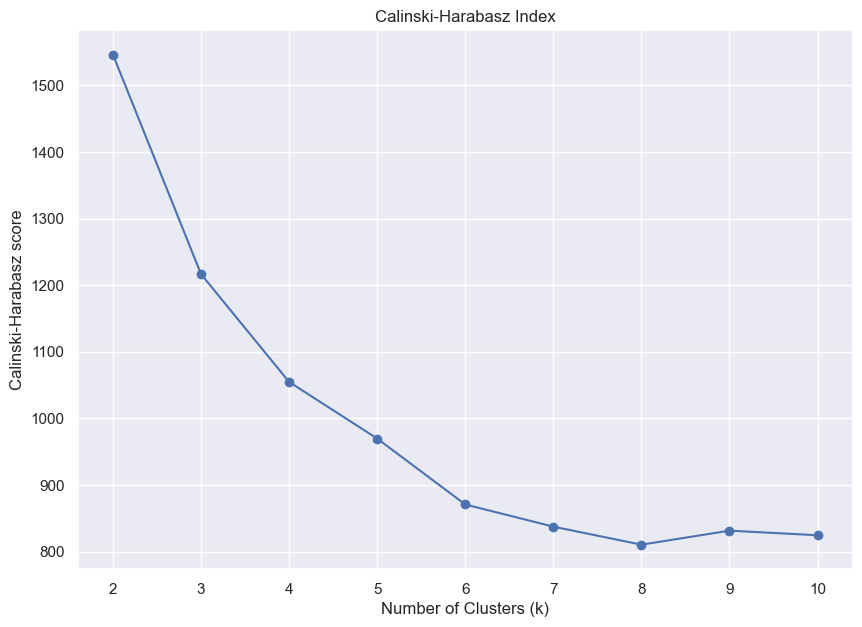

In [38]:
# Calinski-Harabasz Index (Variance ratio criterion)
# The score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion.
# Higher the index better the performance.

CH_scores = []
k_values=[2,3,4,5,6,7,8,9,10]
for k in k_values:
    cluster = KMeans(n_clusters = k, n_init='auto', random_state = 10)
    predict = cluster.fit(scaled_df)
    score = calinski_harabasz_score(scaled_df, predict.labels_)
    CH_scores.append(score)

sns.set_theme()
plt.figure(figsize=(10, 7))
plt.plot(k_values, CH_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz score')
plt.title('Calinski-Harabasz Index')
plt.show()

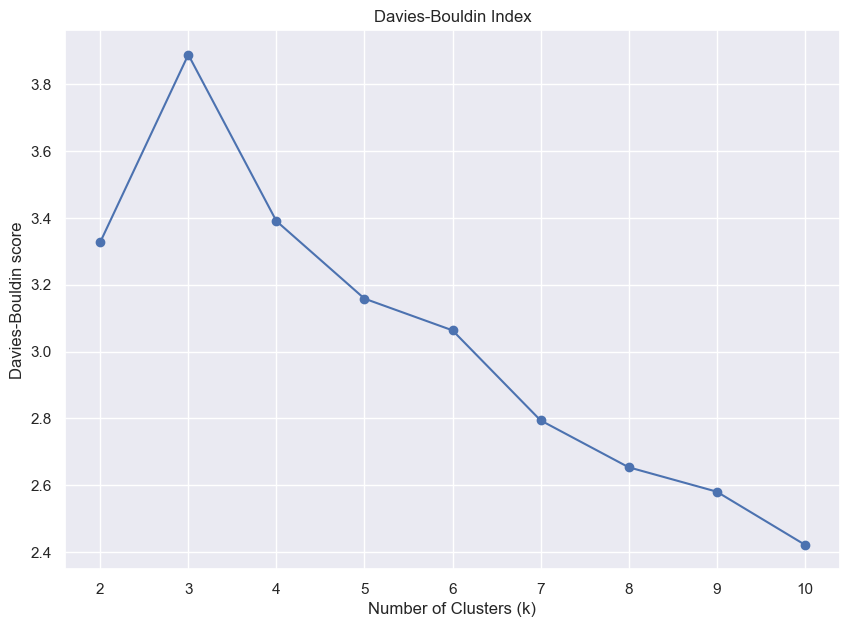

In [39]:
# Davies-Bouldin Index
# The Davies-Bouldin Index is defined as the average similarity measure of each cluster with its most similar cluster. 
# Similarity is the ratio of within-cluster distances to between-cluster distances.
# Lower the values, higher cluster performance.


DB_scores = []
k_values=[2,3,4,5,6,7,8,9,10]
for k in k_values:
    cluster = KMeans(n_clusters = k, random_state = 10) # n_init='auto'
    predict = cluster.fit(scaled_df)
    score = davies_bouldin_score(scaled_df, predict.labels_)
    DB_scores.append(score)

sns.set_theme()
plt.figure(figsize=(10, 7))
plt.plot(k_values, DB_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin Index')
plt.show()


## 5.4 Retrieve the Clusters

In [58]:
# Using the ideal number of clusters to build model
model = KMeans(n_clusters= 3, random_state= 10)
model.fit(scaled_df)

KMeans(n_clusters=3, random_state=10)

In [59]:
# Set cluster numbers to customers
df_final = df2.copy()
df_final['cluster'] = model.labels_
df_final.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
1,F,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,F,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


# 6. Cluster Analysis

In [60]:
# check the size of each cluster
np.unique(model.labels_,return_counts=True)

(array([0, 1, 2]), array([ 1278,  5453, 23269], dtype=int64))

Text(1.85, 23299, '23269')

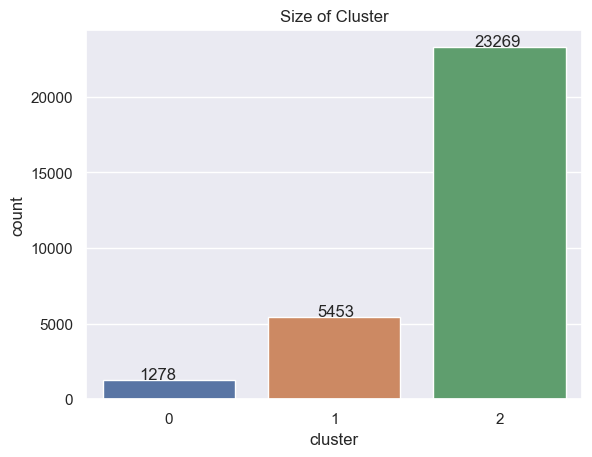

In [62]:
#plot a barplot to visualise the cluster size
sns.countplot(data= df_final, x='cluster')
plt.title('Size of Cluster')
plt.text(x=-.18, y=df_final.cluster.value_counts()[0]+ 30, s=np.unique(model.labels_,return_counts=True)[1][0])
plt.text(x=.9, y=df_final.cluster.value_counts()[1]+ 30, s=np.unique(model.labels_,return_counts=True)[1][1])
plt.text(x=1.85, y=df_final.cluster.value_counts()[2]+ 30, s=np.unique(model.labels_,return_counts=True)[1][2])

In [63]:
# Cluster Centers
center = pd.DataFrame(model.cluster_centers_, columns=df_final.columns[2:37])
center.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.442611,0.458728,0.226083,0.156295,0.098308,0.255022,0.308400,0.379239,0.092038,0.793496,...,1.380297,0.623521,0.284797,1.129356,0.350537,0.419110,1.391415,0.797739,1.553094,1.904982
1,0.580860,0.572129,0.312099,0.464965,0.505327,0.317686,0.418417,0.250940,0.148236,0.353298,...,0.057383,0.554563,0.765148,0.353664,0.544059,0.503842,0.003396,0.113390,-0.022623,-0.088050
2,-0.160113,-0.158957,-0.085386,-0.117297,-0.123551,-0.088281,-0.114764,-0.079494,-0.039713,-0.126169,...,-0.089194,-0.163896,-0.194539,-0.144693,-0.146454,-0.140815,-0.077182,-0.070308,-0.079974,-0.083995


In [64]:
# clust_profile = df_final.drop(['Bank'],axis=1)
clust_profile = df_final.groupby('cluster').mean()
clust_profile['Freq'] = df_final.cluster.value_counts().sort_index()
clust_profile

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Freq
cluster,,,,,,,,,,,,,,,,,,,,,
0,4.165884,0.623631,0.575900,0.430360,0.276995,0.206573,0.273865,0.266041,0.319249,0.143192,...,0.716745,0.586072,0.735524,0.212050,0.183099,1.084507,0.472613,0.708138,0.809859,1278
1,4.467082,0.733725,0.655052,0.513295,0.504860,0.466899,0.306620,0.322208,0.249037,0.172749,...,0.667706,0.949569,0.339446,0.285714,0.208142,0.194572,0.166881,0.079039,0.036677,5453
2,4.100348,0.138596,0.140187,0.143496,0.074477,0.064292,0.093300,0.047746,0.067773,0.073188,...,0.153724,0.222399,0.085006,0.021531,0.015084,0.142636,0.084963,0.056083,0.038334,23269


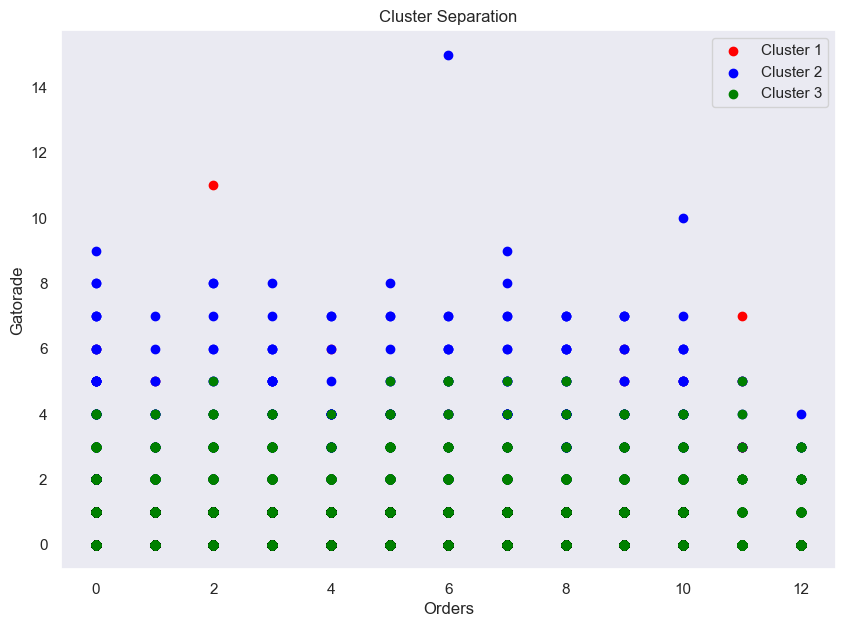

In [65]:
plt.figure(figsize=(10, 7))

plt.scatter(df_final.loc[df_final['cluster'] == 0, 'Orders'],
            df_final.loc[df_final['cluster'] == 0, 'Gatorade'],
            color='red', label='Cluster 1')
plt.scatter(df_final.loc[df_final['cluster'] == 1, 'Orders'],
            df_final.loc[df_final['cluster'] == 1, 'Gatorade'],
            color='blue', label='Cluster 2')
plt.scatter(df_final.loc[df_final['cluster'] == 2, 'Orders'],
            df_final.loc[df_final['cluster'] == 2, 'Gatorade'],
            color='green', label='Cluster 3')

sns.set_theme()
plt.xlabel('Orders')
plt.ylabel('Gatorade')
plt.title('Cluster Separation')
plt.legend()
plt.grid(False)
plt.show()

## 6.1 Cluster 1 

In [66]:
# List cluster 1 brands
cluster_1_brands = sorted(zip(list(center.iloc[0, :]), list(center.columns)), reverse= True)[:15]
cluster_1_brands

[(2.548742796795466, 'Pladis'),
 (2.530707799408998, 'Burberry'),
 (1.9049819715978185, 'Kraft'),
 (1.8892479626376397, 'Dairy Queen'),
 (1.5530940579570909, 'Jiffy mix'),
 (1.3914145115864083, 'Colavita'),
 (1.3877183404200413, 'Pop Chips'),
 (1.3802972954444006, 'LG'),
 (1.2246369012730602, 'J.M. Smucker'),
 (1.1293559021522264, 'Tommy Hilfiger'),
 (0.7977386883316026, 'Microsoft'),
 (0.7934956488090285, 'Brooks'),
 (0.6264113700930598, 'H&M'),
 (0.623520652869678, 'Dior'),
 (0.6183554847302134, 'Fendi')]

The cluster 1 included brands like "Pladis", "Kraft", "Dairy Queen" which are providers of food and snacks products.

## 6.2 Cluster 2 

In [68]:
# List cluster 2 brands
cluster_2_brands = sorted(zip(list(center.iloc[1, :]), list(center.columns)), reverse= True)[:15]
cluster_2_brands

[(0.7651475870842215, 'Scabal'),
 (0.5808599290048488, 'Jordan'),
 (0.5721290217144095, 'Gatorade'),
 (0.5545627991552448, 'Dior'),
 (0.544058877793407, 'Hollister'),
 (0.5388106007090776, 'H&M'),
 (0.5164879420934582, 'Huawei'),
 (0.5053271393941183, 'Udis'),
 (0.5038418926664845, 'Forever 21'),
 (0.4649654919092498, 'Asus'),
 (0.41841741343095673, 'Wrangler'),
 (0.35366362196159223, 'Tommy Hilfiger'),
 (0.35329816266249037, 'Brooks'),
 (0.31768631961148813, 'Mondelez International'),
 (0.3120994516291661, 'Samsung')]

The cluster 2 included "Scabel", "Jordan", "H&M", "Forever 21" which are cosmetics and fashion. 

## 6.3 Cluster 3

In [70]:
# List cluster 1 brands
cluster_3_brands = sorted(zip(list(center.iloc[2, :]), list(center.columns)), reverse= True)[:15]
cluster_3_brands

[(0.001528808622294584, 'Siemens'),
 (-0.02065291113235453, 'IBM'),
 (-0.039712714939928846, 'Fila'),
 (-0.04042320003048998, 'Asics'),
 (-0.05683682918864472, 'Hewlett Packard'),
 (-0.05964597893631276, 'Compaq'),
 (-0.07030773650058532, 'Microsoft'),
 (-0.07031279410631937, 'Fendi'),
 (-0.07718176916297022, 'Colavita'),
 (-0.07949371048718264, 'Vans'),
 (-0.07997405378442492, 'Jiffy mix'),
 (-0.08399450578324709, 'Kraft'),
 (-0.08538561457744663, 'Samsung'),
 (-0.08828064789689752, 'Mondelez International'),
 (-0.08919445924301214, 'LG')]

The cluster 3 included "IBM", "Hewlett Packard", "Compag", "Samsung", "LG" which are electronics.  

In [71]:
clustered_data = df_final.groupby(['cluster']).sum()
clustered_data


,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
cluster,,,,,,,,,,,,,,,,,,,,,
0,5324,797,736,550,354,264,350,340,408,183,...,989,916,749,940,271,234,1386,604,905,1035
1,24359,4001,3572,2799,2753,2546,1672,1757,1358,942,...,712,3641,5178,1851,1558,1135,1061,910,431,200
2,95411,3225,3262,3339,1733,1496,2171,1111,1577,1703,...,1375,3577,5175,1978,501,351,3319,1977,1305,892


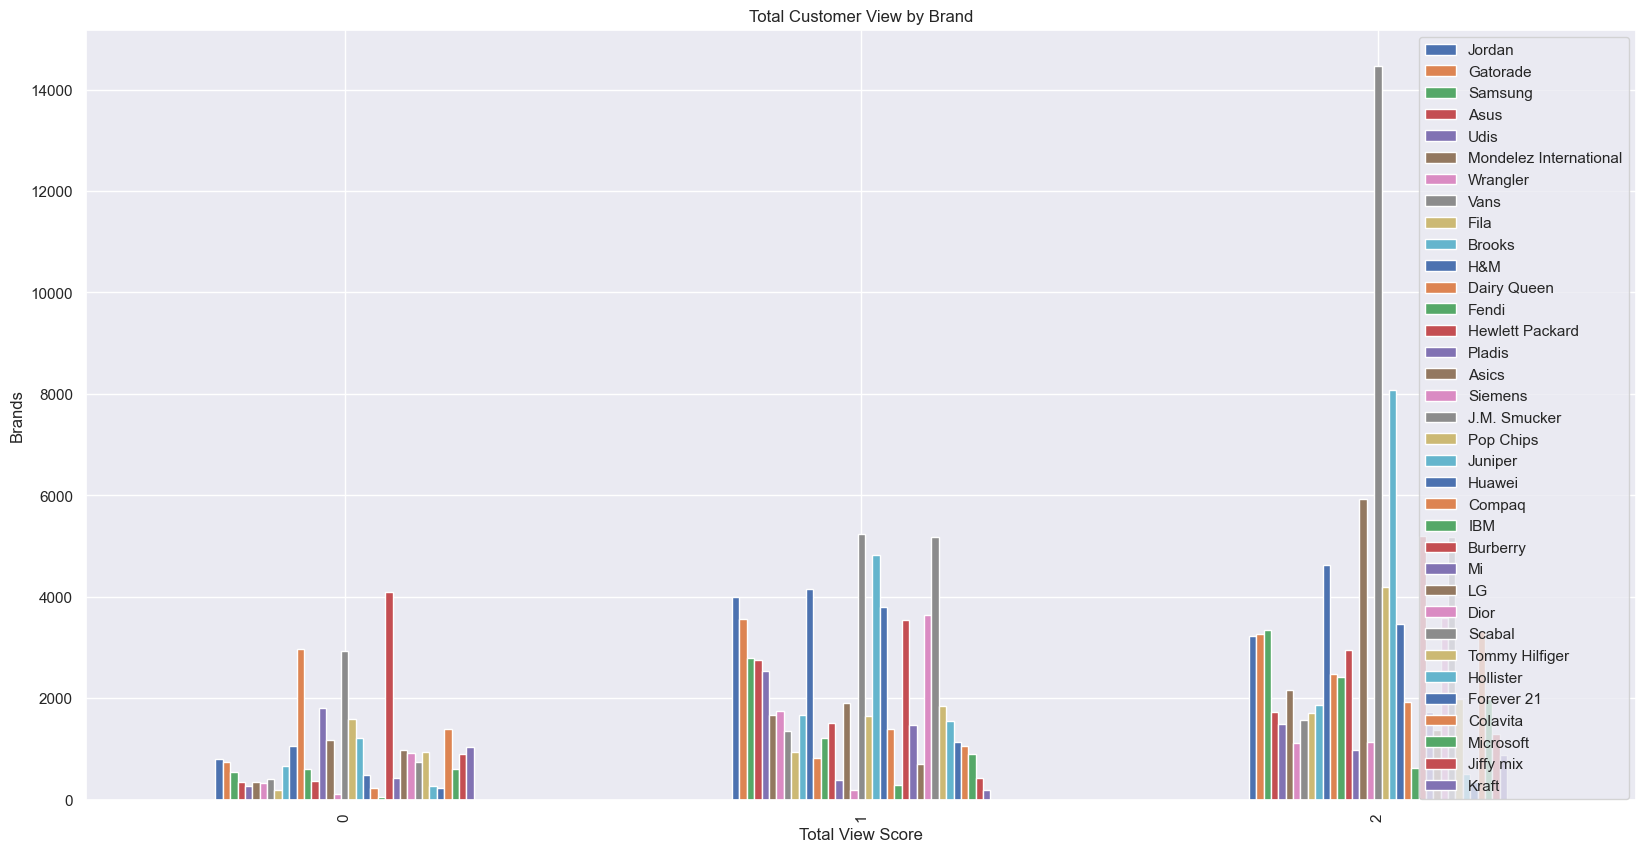

In [72]:
# Total Customer View by Brand
views1 = clustered_data[brands]
views1.plot(kind='bar', figsize=(20,10))
plt.ylabel('Brands')
plt.xlabel('Total View Score')
plt.title('Total Customer View by Brand')
plt.show()

# 7. Conclusion

- In this case study, we have grouped customer dataset into 3 clusters based on the brands they have searched in the e-commerce website. 
- We have used Silhouette score to find the optimum number of clusters and decided k=3 as the best pick after analysing the Silhouette score.
- On applying K-means algorithm with 3 number of clusters, we have segmented the customers under
    - Food and snacks
    - Lifestyle and Fashion
    - Electronics

- These clusters give the information about the interest of the customer in the different brands. 
- This type of segmentation can help the e-commerce companies , to know the customer choices and they can provide more accurate recommendation to the customers.
